<a href="https://colab.research.google.com/github/Jegsaran/Deep-learning/blob/main/Classification_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
#Loading Data
from sklearn.datasets import load_breast_cancer

In [3]:
df = load_breast_cancer()
type(df)
print(df)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df.data.shape

(569, 30)

In [7]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.data,df.target,test_size=.33)


In [19]:
N,D = X_train.shape
N,D

(381, 30)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape = (D,),activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.2544 - accuracy: 0.2073 - val_loss: 1.1890 - val_accuracy: 0.2181
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.1426 - accuracy: 0.2283 - val_loss: 1.0772 - val_accuracy: 0.2766
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0387 - accuracy: 0.2861 - val_loss: 0.9750 - val_accuracy: 0.3617
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9422 - accuracy: 0.3386 - val_loss: 0.8836 - val_accuracy: 0.4202
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.8537 - accuracy: 0.4252 - val_loss: 0.8048 - val_accuracy: 0.4894
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7804 - accuracy: 0.4908 - val_loss: 0.7328 - val_accuracy: 0.5426
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.5669 - val_loss: 0.6729 - val_accuracy: 0.6011
Epoch 8/100

In [23]:
# Evaluate the model - evaluate() returns loss and accuracy
print('Train Score=',model.evaluate(X_train,y_train))
print('Test Score=',model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9633
Train Score= [0.1163991391658783, 0.9632545709609985]
6/6 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9628
Test Score= [0.11623893678188324, 0.9627659320831299]


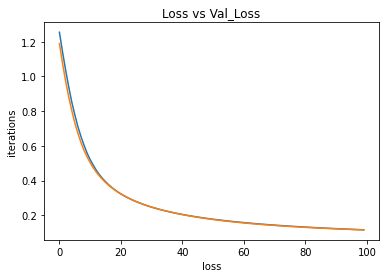

In [25]:
#Plotting loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title('Loss vs Val_Loss')
plt.xlabel('loss')
plt.ylabel('iterations')
plt.legend
plt.show()

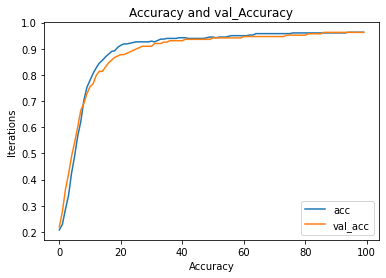

In [26]:
# Plot the accuracy

import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label="val_acc")
plt.title("Accuracy and val_Accuracy", loc="center")
plt.xlabel("Accuracy")
plt.ylabel("Iterations")
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test)
print(y_pred) # they are outputs of the sigmoid, interpreted as probabilities

[[9.9616396e-01]
 [9.7436249e-01]
 [1.3420135e-02]
 [9.1926026e-01]
 [9.9863815e-01]
 [9.2273796e-01]
 [2.4113297e-02]
 [2.1730334e-02]
 [9.3921900e-02]
 [9.7597706e-01]
 [9.9448746e-01]
 [9.9543470e-01]
 [9.9449611e-01]
 [9.8014016e-07]
 [9.0611488e-01]
 [6.9740117e-03]
 [9.7304201e-01]
 [9.9692994e-01]
 [9.1153812e-01]
 [9.2663628e-01]
 [9.9664855e-01]
 [7.8553391e-01]
 [9.0176976e-01]
 [9.5897830e-01]
 [6.2051415e-04]
 [1.0384917e-03]
 [7.7966881e-01]
 [5.3636730e-03]
 [8.4989619e-01]
 [3.1596366e-01]
 [9.4027817e-01]
 [1.6777235e-01]
 [9.7585613e-01]
 [7.6404691e-01]
 [9.7125429e-01]
 [8.9798212e-01]
 [9.9834621e-01]
 [9.1251731e-04]
 [1.8466413e-02]
 [8.6536866e-01]
 [1.8834859e-01]
 [8.1979424e-01]
 [8.4279478e-01]
 [2.5624335e-03]
 [1.0805428e-03]
 [9.7924447e-01]
 [9.9559021e-01]
 [9.8425519e-01]
 [2.7388126e-02]
 [9.9601007e-01]
 [9.8433721e-01]
 [1.9200133e-06]
 [9.9463129e-01]
 [2.3863703e-02]
 [9.5103443e-01]
 [8.6331367e-04]
 [8.0652523e-01]
 [5.0239986e-01]
 [9.9615300e-0

In [28]:
import numpy as np
np.round(y_pred)

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [29]:
y_pred = np.round(y_pred).flatten()
print(y_pred)

[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]


In [30]:
# Calculate the accuracy, compare it to evaluate() output

print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9628
Evaluate output: [0.11623893678188324, 0.9627659320831299]
